In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
backSub = cv2.createBackgroundSubtractorMOG2(varThreshold = 4)
#backSub = cv2.createBackgroundSubtractorGMG()

In [3]:
#https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html
#https://pythonprogramming.net/mog-background-reduction-python-opencv-tutorial/
#https://docs.opencv.org/3.3.0/db/d5c/tutorial_py_bg_subtraction.html
cap = cv2.VideoCapture('CycleGAN train/horse.avi')  
frame_no = 0
while True:
    ret, frame = cap.read()
    frame_no = frame_no+1
    if frame is None:
        break
    fgMask = backSub.apply(frame)
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    if(frame_no%5==0):
        name = 'BackSub/'+str(frame_no)+'.png'
        #plt.matsave(name,fgMask)
        name = str(frame_no)+'.png'
        #plt.imsave(name,frame)
    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

In [4]:
a = plt.imread('Results/BackSub/85.png')
a = a[:,:,:3]
b = plt.imread('Results/BackSub/85_fake_B.png')
c = plt.imread('Results/BackSub/85_real_A.png')
d = b
#0 purple 1 yellow

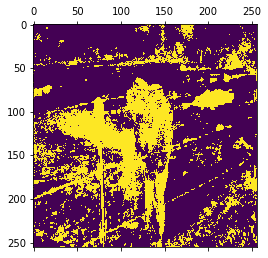

In [5]:
a = 0.2989 * a[:,:,0] + 0.5870 * a[:,:,1] + 0.1140 * a[:,:,2]#Converting rgb to grayscale
a[a<0.5]=0
a[a>0.5]=1
plt.matshow(a)

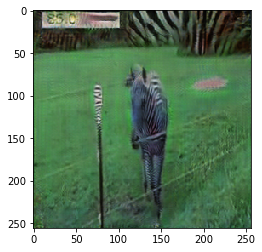

In [6]:
plt.imshow(b)

In [7]:
d[a==0]=c[a==0]

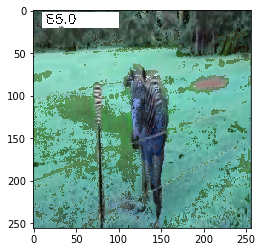

In [8]:
plt.imshow(d)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


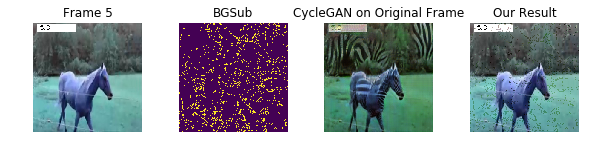

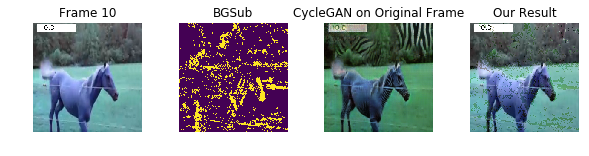

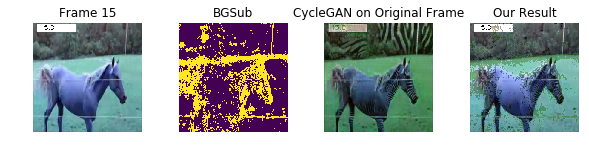

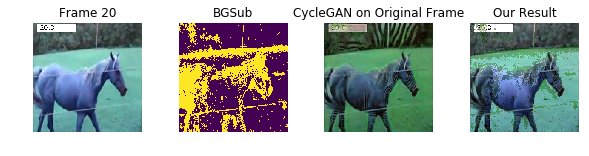

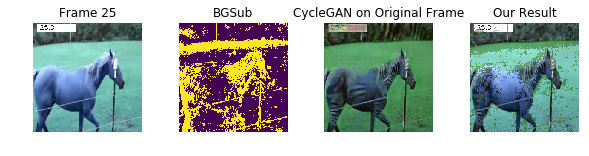

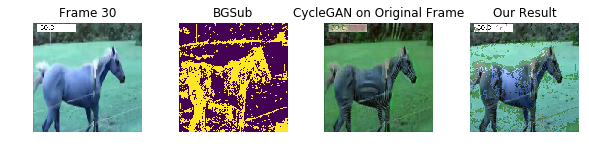

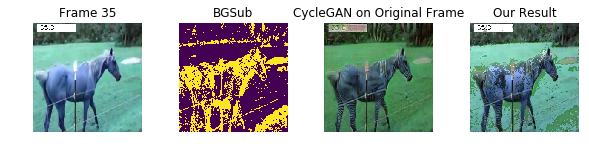

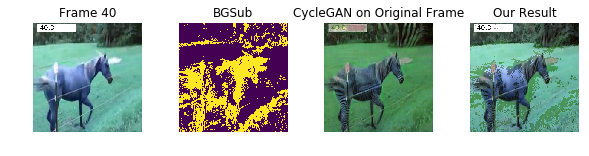

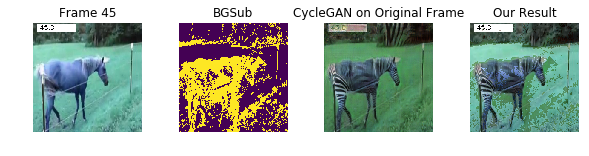

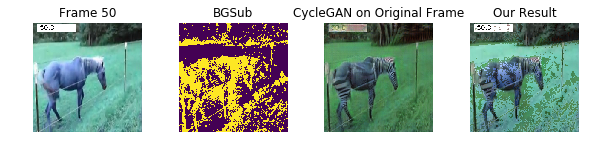

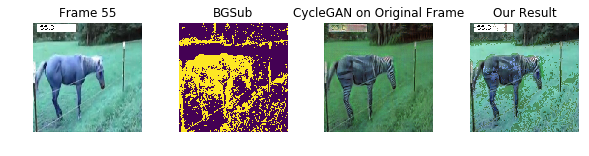

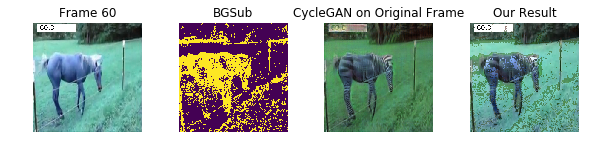

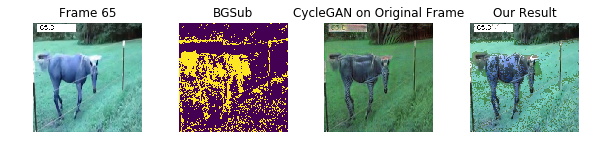

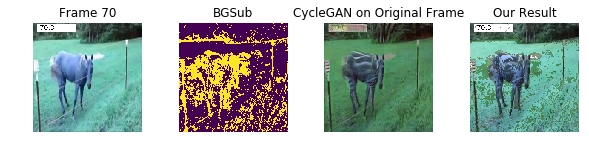

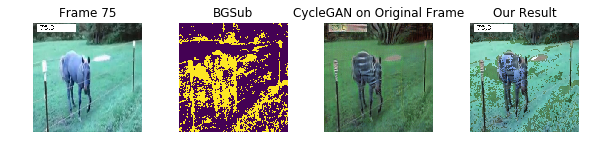

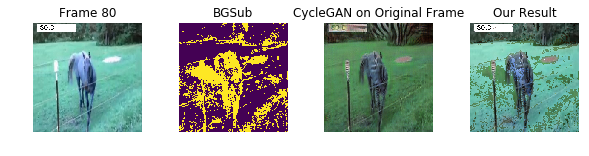

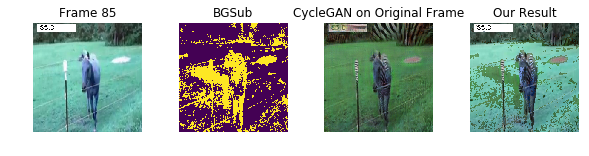

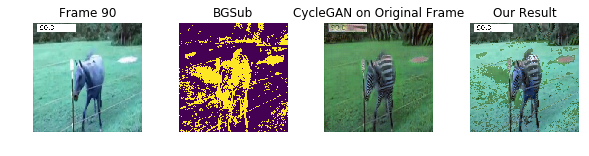

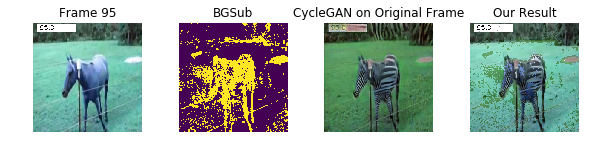

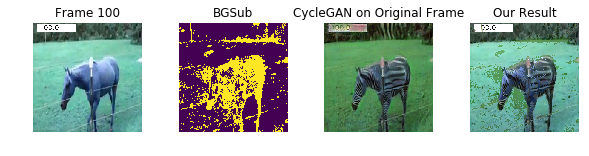

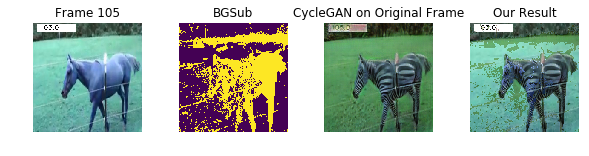

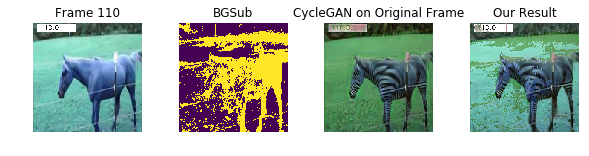

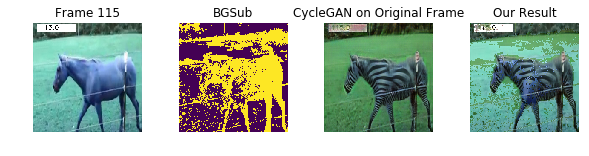

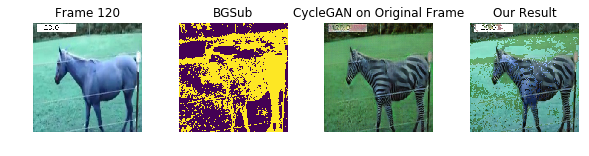

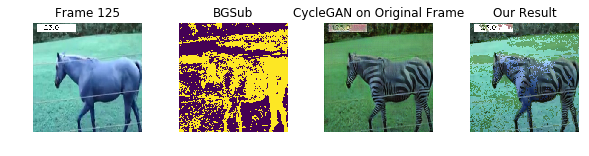

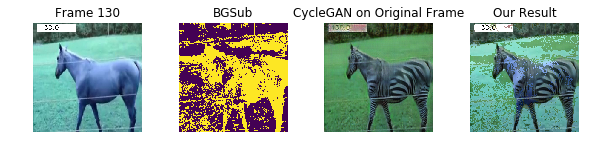

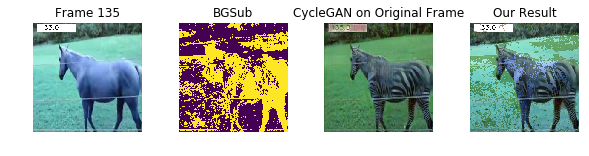

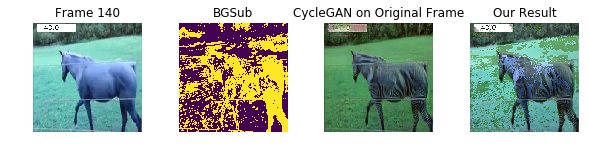

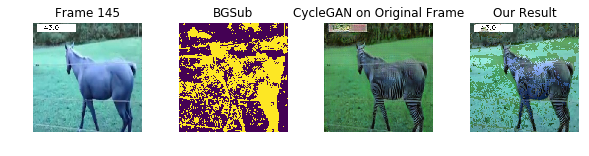

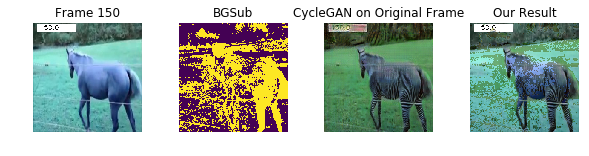

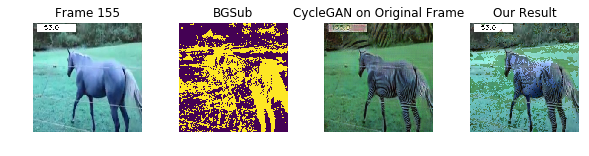

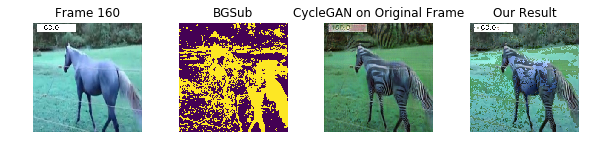

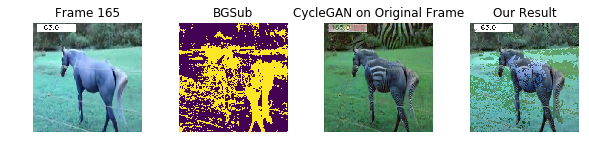

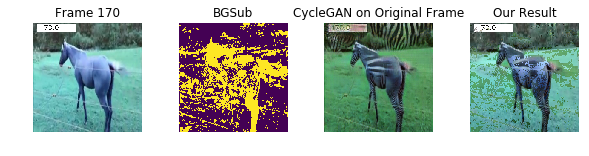

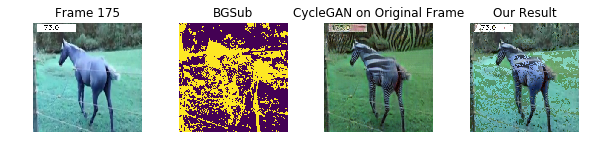

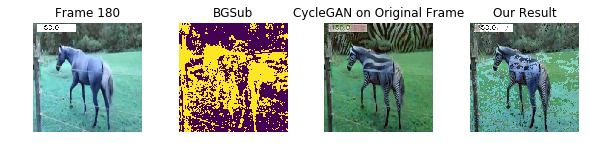

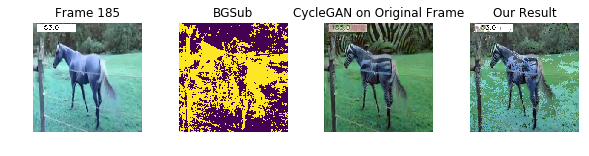

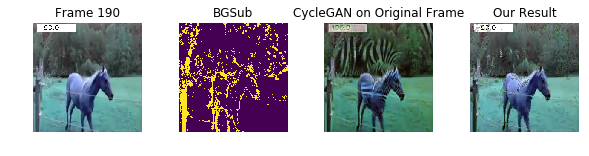

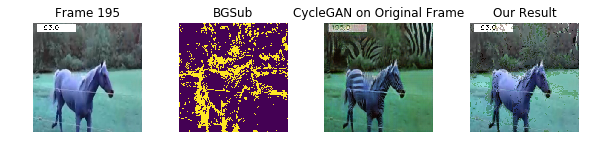

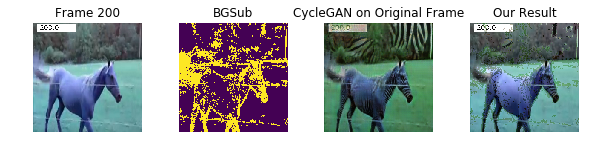

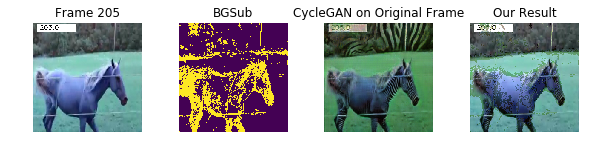

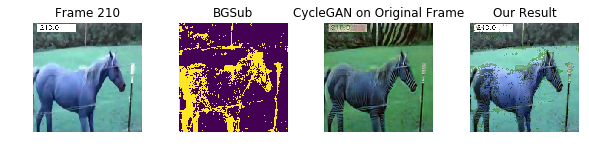

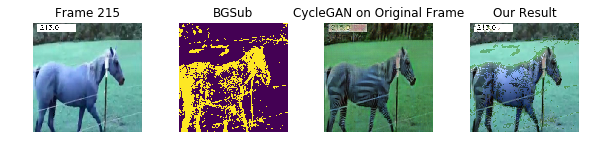

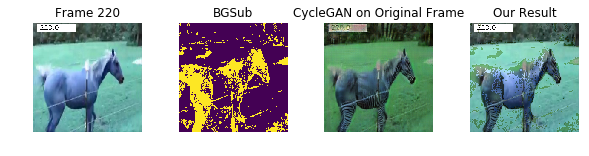

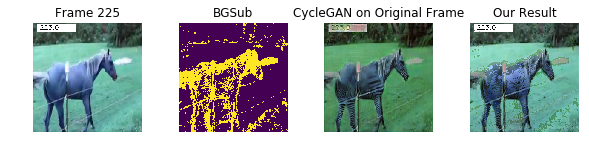

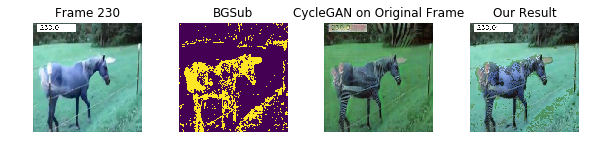

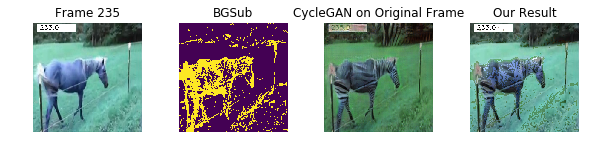

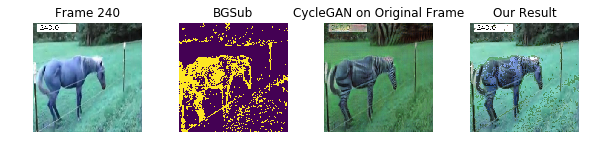

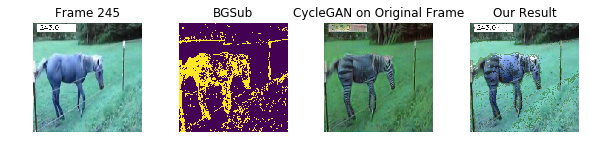

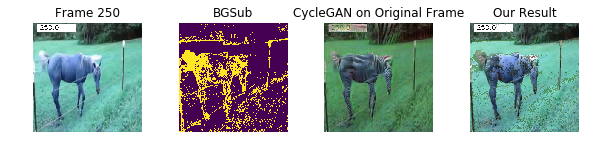

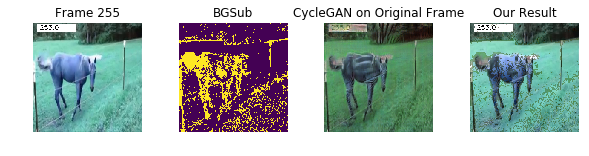

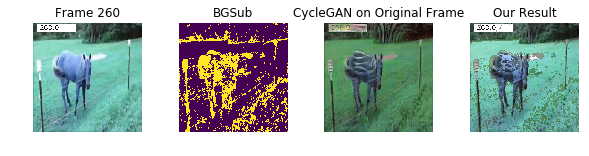

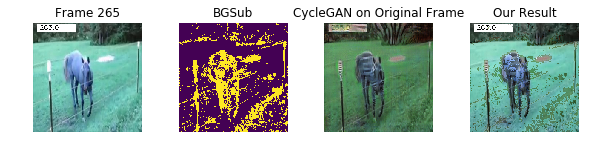

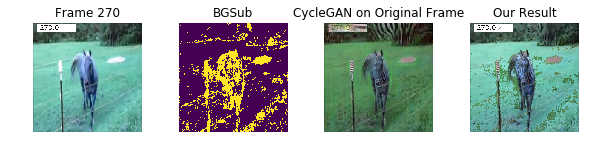

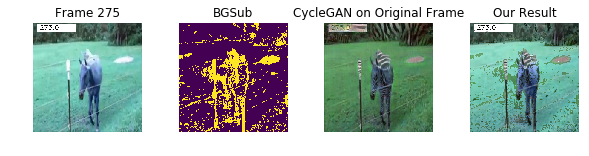

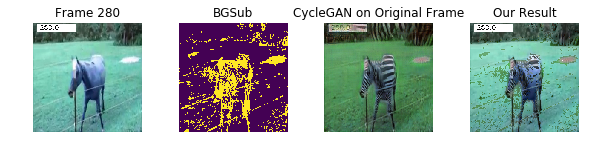

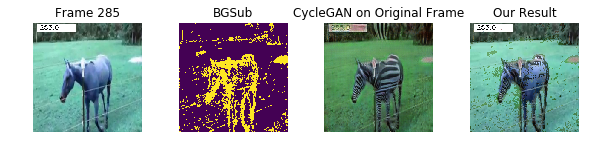

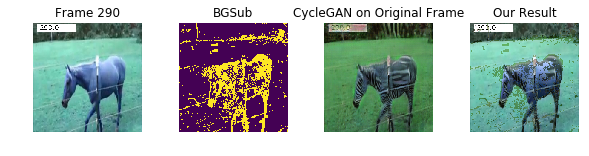

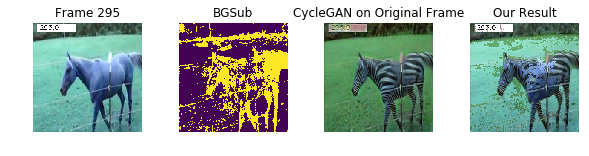

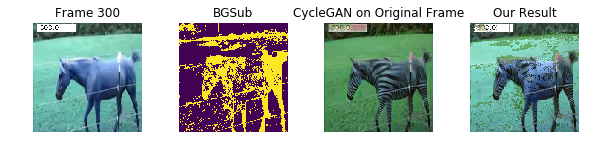

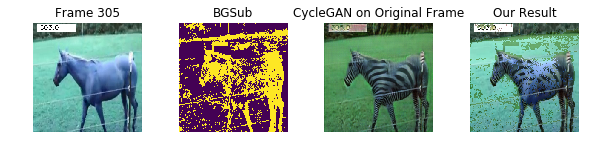

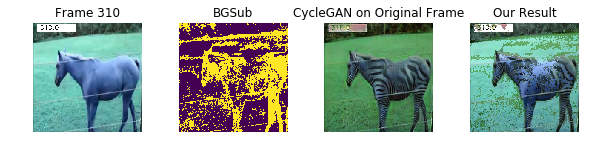

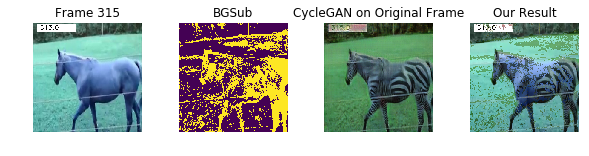

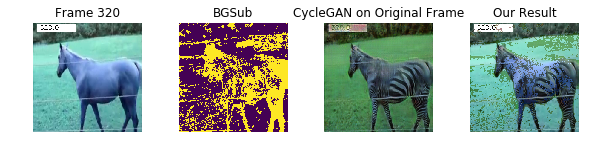

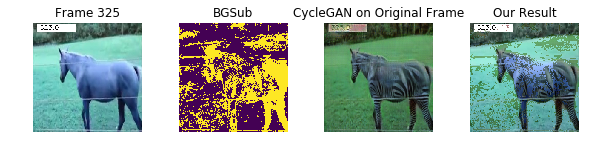

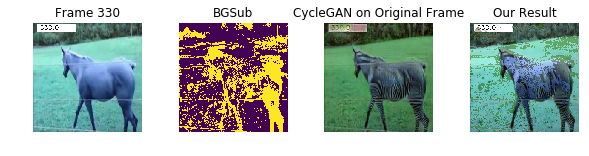

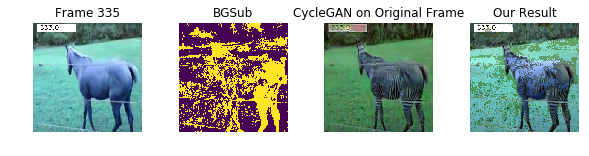

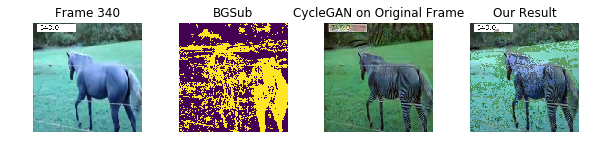

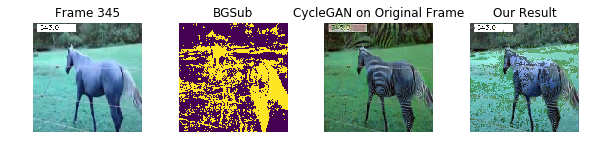

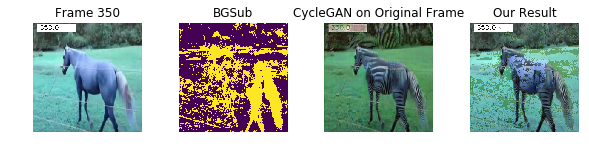

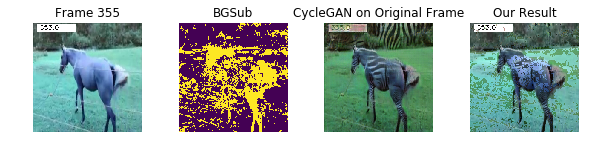

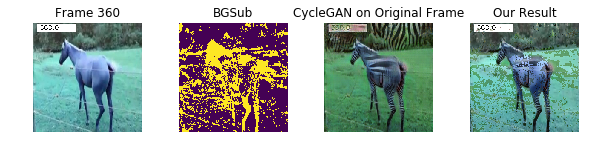

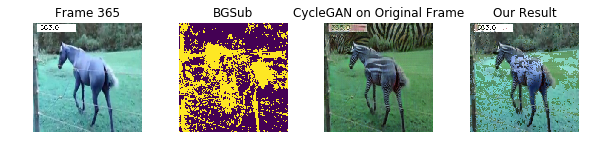

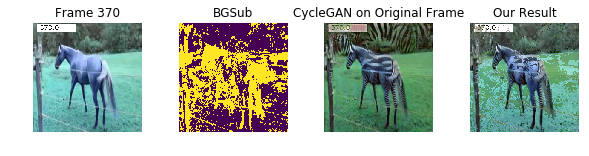

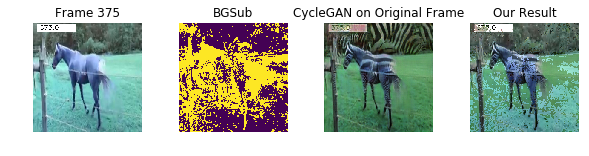

In [9]:
for i in range(5,376,5):
    name = 'Results/BackSub/'+str(i)+'.png'
    a = plt.imread(name)
    a = a[:,:,:3]
    name = 'Results/BackSub/'+str(i)+'_fake_B.png'
    b = plt.imread(name)
    name = 'Results/BackSub/'+str(i)+'_real_A.png'
    c = plt.imread(name)
    a = 0.2989 * a[:,:,0] + 0.5870 * a[:,:,1] + 0.1140 * a[:,:,2]#Converting rgb to grayscale
    a[a<0.5]=0
    a[a>0.5]=1
    plt.figure(figsize=(10,2))
    plt.subplot(1,4,1)
    plt.imshow(c)
    plt.axis("off")
    plt.title('Frame '+str(i))
    plt.subplot(1,4,2)
    plt.imshow(a)
    plt.axis("off")
    plt.title('BGSub')
    plt.subplot(1,4,3)
    plt.imshow(b)
    plt.axis("off")
    plt.title('CycleGAN on Original Frame')
    d = b
    d[a==0]=c[a==0]
    plt.subplot(1,4,4)
    plt.imshow(d)
    plt.axis("off")
    plt.title('Our Result')
    fname = str(i)+'.png'
    plt.savefig(fname)
    